In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

hello

In [178]:
data = pd.read_csv('marquette.csv')
#data.head()

In [179]:
#used Sienna's work for most of the data processing
data = data.drop("Unnamed: 2", axis='columns')
data = data.drop("Unnamed: 23", axis='columns')
#data.head()

In [180]:
data.rename(columns={'Unnamed: 0':'GameID','Unnamed: 1':'Date','Unnamed: 3':'Opp','Unnamed: 4':'W/L','Unnamed: 5':'Points Scored','Unnamed: 6':'Opp Points'},inplace=True)
data.rename(columns={'School':'MU_FGM','School.1':'MU_FGA','School.2':'MU_FG_PCT','School.3':'MU_3PM','School.4':'MU_3PA','School.5':'MU_3PCT','School.6':'MU_FTM','School.7':'MU_FTA','School.8':'MU_FT_PCT',
                   'School.9':'MU_OFF_RB','School.10':'MU_TRB','School.11':'MU_AST','School.12':'MU_STL','School.13':'MU_BLK','School.14':'MU_TOV','School.15':'MU_PF'},inplace=True)
data.rename(columns={'Opponent':'Opp_FGM','Opponent.1':'Opp_FGA','Opponent.2':'Opp_FG_PCT','Opponent.3':'Opp_3PM','Opponent.4':'Opp_3PA','Opponent.5':'Opp_3PCT','Opponent.6':'Opp_FTM','Opponent.7':'Opp_FTA','Opponent.8':'Opp_FT_PCT',
                   'Opponent.9':'Opp_OFF_RB','Opponent.10':'Opp_TRB','Opponent.11':'Opp_AST','Opponent.12':'Opp_STL','Opponent.13':'Opp_BLK','Opponent.14':'Opp_TOV','Opponent.15':'Opp_PF'},inplace=True)
data = data.iloc[1:]
numerics = data.columns.drop({'Date','Opp','W/L'})
data[numerics] = data[numerics].apply(pd.to_numeric)

data['W/L'] = data.get('W/L').replace('L',1)
data['W/L'] = data.get('W/L').replace('L (1 OT)',1)
data['W/L'] = data.get('W/L').replace('L (2 OT)',1)
data['W/L'] = data.get('W/L').replace('W',0)
data['W/L'] = data.get('W/L').replace('W (1 OT)',0)

data = data.drop(['Date','Opp','MU_FGM','MU_FTA','Opp_FTA'],axis=1)
#data cleaning ends here
data.head()

C:\Users\zephi\AppData\Local\Temp\ipykernel_39540\903730821.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['W/L'] = data.get('W/L').replace('W (1 OT)',0)


,GameID,W/L,Points Scored,Opp Points,MU_FGA,MU_FG_PCT,MU_3PM,MU_3PA,MU_3PCT,MU_FTM,...,Opp_3PCT,Opp_FTM,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,1,0,92,70,67,0.522,9,25,0.360,13,...,0.269,11,0.688,16,38,10,6,4,14,13
2,2,0,95,65,62,0.548,13,30,0.433,14,...,0.263,8,0.533,13,36,14,6,1,16,17
3,3,0,71,64,62,0.435,5,17,0.294,12,...,0.333,11,0.846,11,37,8,6,7,15,15
4,4,0,71,69,55,0.455,11,34,0.324,10,...,0.385,18,0.900,4,27,10,5,3,12,19
5,5,0,73,59,64,0.453,6,25,0.240,9,...,0.353,9,0.563,7,29,17,7,2,18,12


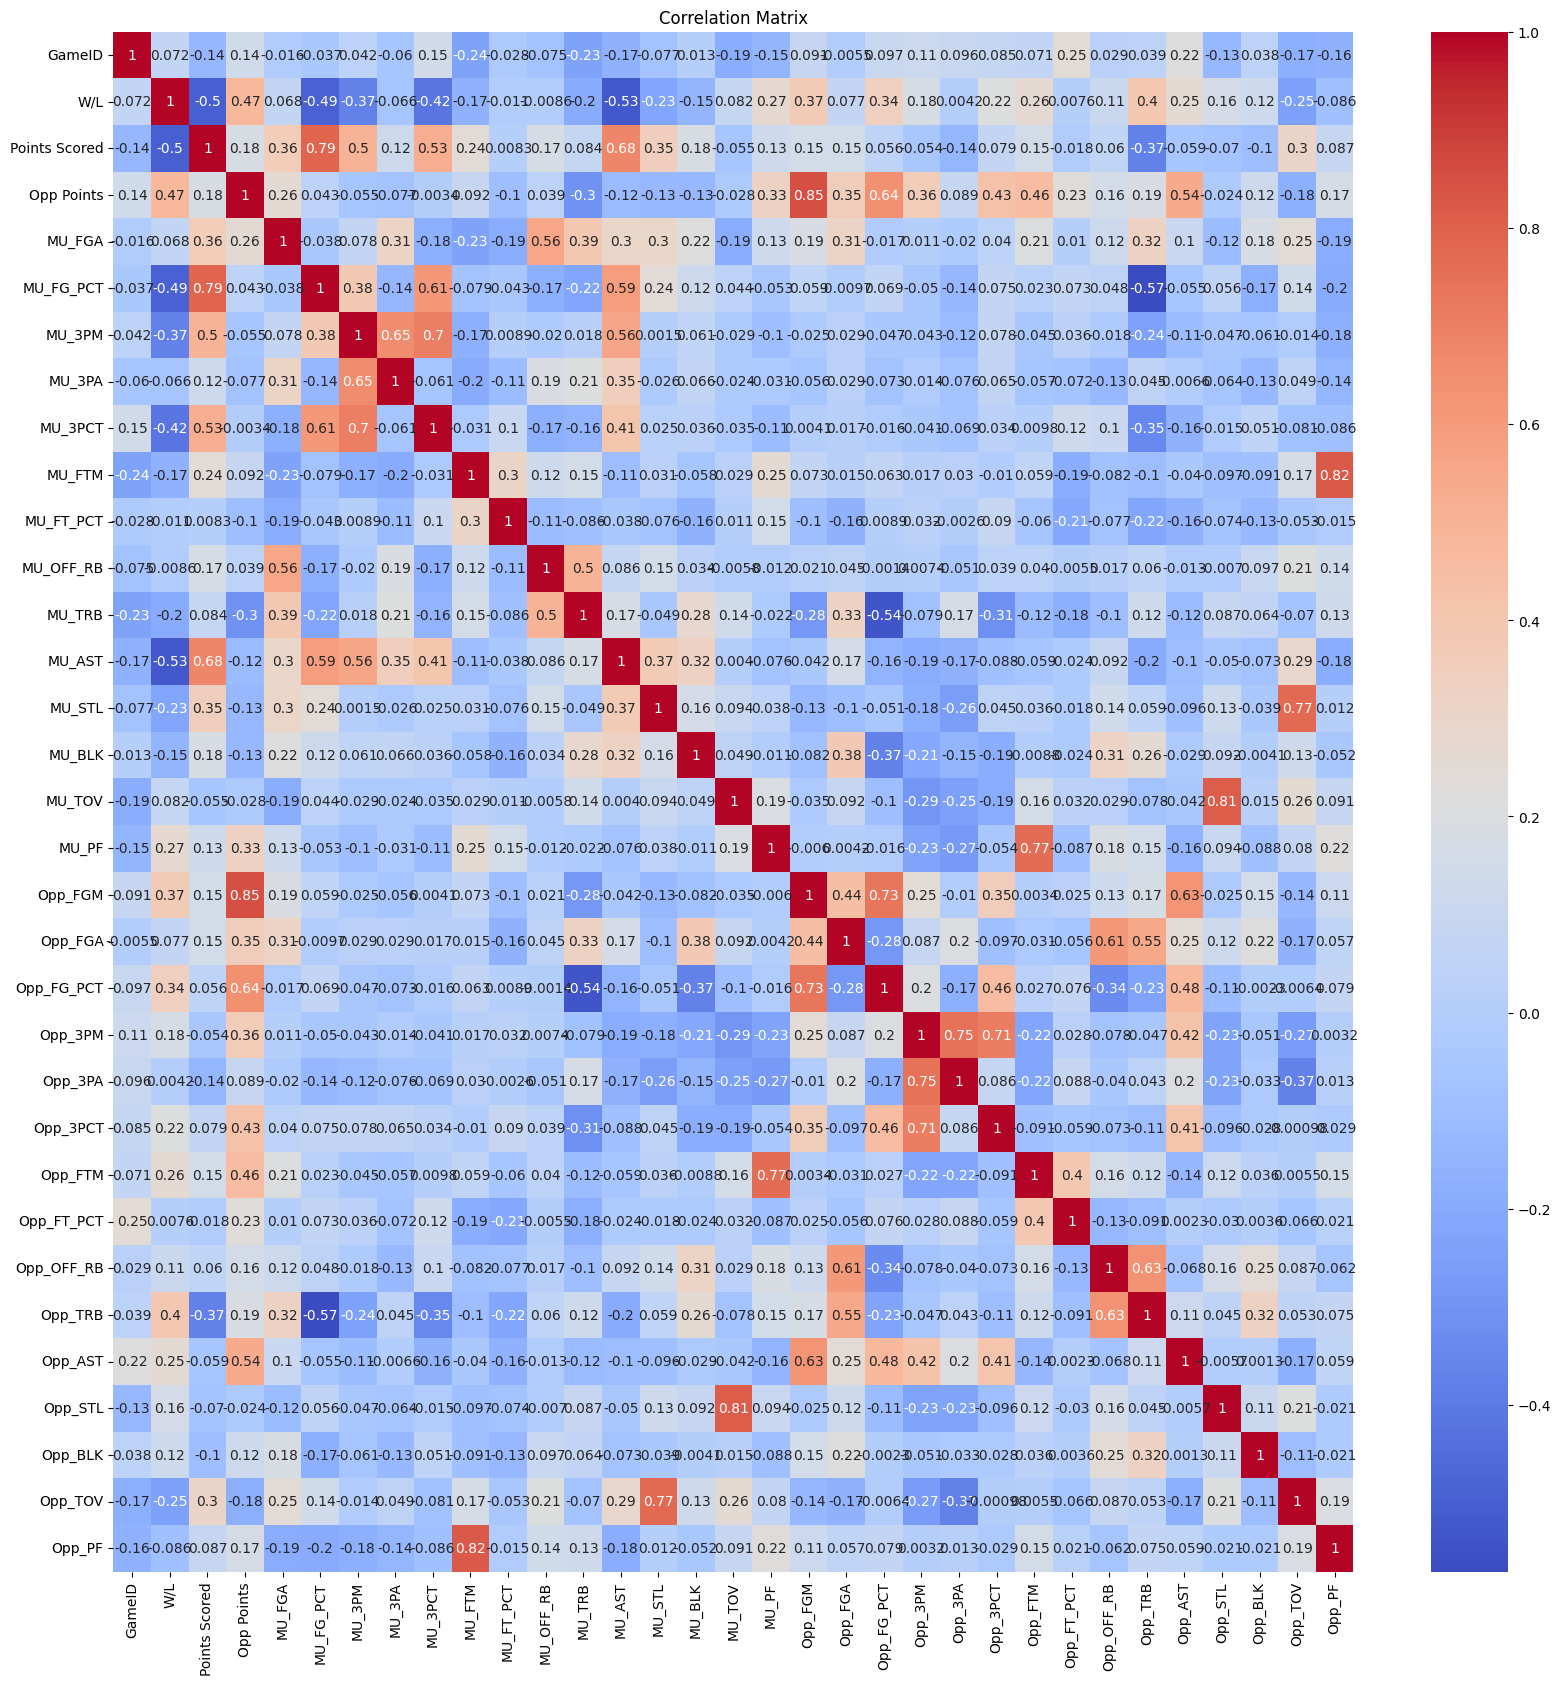

In [181]:
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [183]:
#used random forest classifier to figure out the best variables for the dataset
X = data.drop(['W/L'], axis=1)  # Features
y = data['W/L']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # splitting traning set from 

In [184]:
#random forest classifier to help filter out important variables.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [185]:
importances = rf_model.feature_importances_

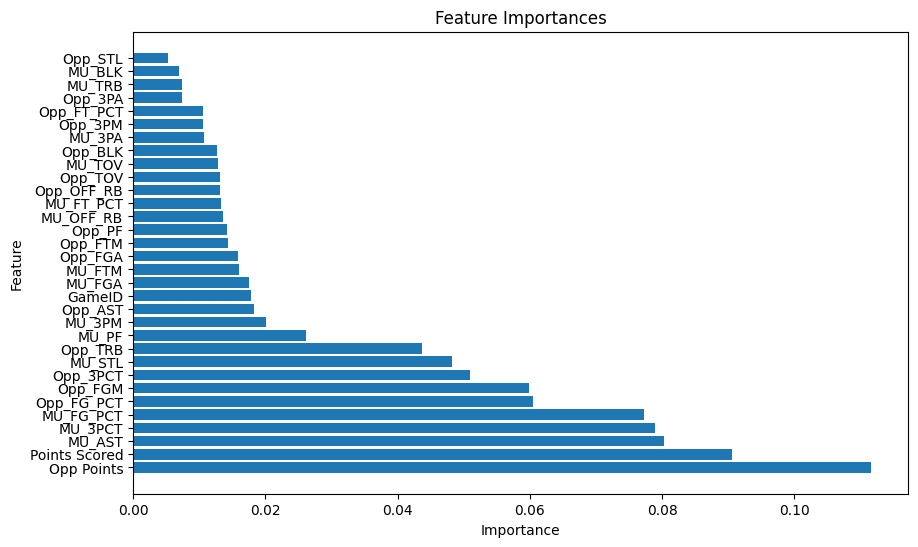

In [186]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [187]:
# Select top 10 features
top_15_features = feature_importances.head(15)['feature'].tolist()

# Create a new DataFrame with only selected features
newDf = X[top_15_features]
newDf.loc[:, 'W/L'] = data[['W/L']]
newDf.head(8)

C:\Users\zephi\AppData\Local\Temp\ipykernel_39540\1539211737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.loc[:, 'W/L'] = data[['W/L']]


,Opp Points,Points Scored,MU_AST,MU_3PCT,MU_FG_PCT,Opp_FG_PCT,Opp_FGM,Opp_3PCT,MU_STL,Opp_TRB,MU_PF,MU_3PM,Opp_AST,GameID,MU_FGA,W/L
1,70,92,20,0.360,0.522,0.371,26,0.269,8,38,15,9,10,1,67,0
2,65,95,23,0.433,0.548,0.394,26,0.263,11,36,16,13,14,2,62,0
3,64,71,7,0.294,0.435,0.350,21,0.333,9,37,14,5,8,3,62,0
4,69,71,11,0.324,0.455,0.469,23,0.385,6,27,18,11,10,4,55,0
5,59,73,13,0.240,0.453,0.407,22,0.353,11,29,14,6,17,5,64,0
6,78,75,17,0.294,0.517,0.508,30,0.476,11,32,18,5,14,6,58,1
7,56,93,19,0.313,0.492,0.407,22,0.310,10,29,13,10,13,7,65,0
8,75,64,11,0.241,0.418,0.426,23,0.250,5,33,21,7,9,8,55,1


In [188]:
#ended up dropping the new dataset with all the best variables because it overfitted the model.
X = newDf.drop(['W/L'], axis=1)
y = newDf['W/L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = data.drop(['W/L'], axis=1)  
y = data['W/L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)

In [189]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [190]:
y_pred = model.predict(X_test)

In [191]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9523809523809523
Confusion Matrix:
 [[15  0]
 [ 1  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.83      0.91         6

    accuracy                           0.95        21
   macro avg       0.97      0.92      0.94        21
weighted avg       0.96      0.95      0.95        21



APPLICATION: Predicting upcoming Marquette vs Dayton game

In [ ]:
subset_df = data.iloc[:, :18]
MU_subset_means = subset_df.mean()# Calculate the mean of the subset
MU_subset_means.loc['Opp Points'] = 49.46 # change this to Dayton's Scoring
MU_subset_dict = MU_subset_means.to_dict()
MU_subset_df = pd.DataFrame([MU_subset_dict])
#MU_subset_df.head(20)


In [ ]:
Dayton_subset = {
    'Opp_FGM':[17.16],
    'Opp_FGA':[36.16],
    'Opp_FG_PCT':[0.473],
    'Opp_3PM':[5.53],
    'Opp_3PA':[14.81],
    'Opp_3PCT':[0.370],
    'Opp_FTM':[9.61],
    'Opp_FT_PCT':[0.718],
    'Opp_OFF_RB':[11.91],
    'Opp_TRB':[23.82],
    'Opp_AST':[10.42],
    'Opp_STL':[3.61],
    'Opp_BLK':[2.79],
    'Opp_TOV':[7.49],
    'Opp_PF':[0.38]
}
dayton_df = pd.DataFrame(Dayton_subset)
#dayton_df.head()

In [198]:
merged_df = pd.concat([MU_subset_df, dayton_df], axis=1)
#print(merged_df.isnull().sum())
#print(merged_df.to_string())
for index, row in merged_df.iterrows():
    for column, value in row.items():
        print(f"{column}: {value}")

GameID: 18.23076923076923
W/L: 0.28846153846153844
Points Scored: 77.125
Opp Points: 49.46
MU_FGA: 60.36538461538461
MU_FG_PCT: 0.47177884615384613
MU_3PM: 8.798076923076923
MU_3PA: 25.14423076923077
MU_3PCT: 0.35100000000000003
MU_FTM: 11.403846153846153
MU_FT_PCT: 0.7207596153846154
MU_OFF_RB: 7.0
MU_TRB: 29.951923076923077
MU_AST: 16.365384615384617
MU_STL: 8.538461538461538
MU_BLK: 3.8653846153846154
MU_TOV: 10.740384615384615
MU_PF: 16.14423076923077
Opp_FGM: 17.16
Opp_FGA: 36.16
Opp_FG_PCT: 0.473
Opp_3PM: 5.53
Opp_3PA: 14.81
Opp_3PCT: 0.37
Opp_FTM: 9.61
Opp_FT_PCT: 0.718
Opp_OFF_RB: 11.91
Opp_TRB: 23.82
Opp_AST: 10.42
Opp_STL: 3.61
Opp_BLK: 2.79
Opp_TOV: 7.49
Opp_PF: 0.38


In [ ]:
# Prepare the prediction data
X_new = merged_df.copy()

# Remove the 'W/L' column if it exists
if 'W/L' in X_new.columns:
    X_new = X_new.drop(['W/L'], axis=1)

# Ensure column order matches training data
X_new = X_new.reindex(columns=X_train.columns)
X_new.isnull().sum()
# Make prediction
dayton_pred = model.predict(X_new)

In [ ]:
print("Predicted Outcome 0 if marqutte will win and 1 if Dayton will win:", dayton_pred)

In [199]:
#print(data.columns)
data.info()
#data.isnull().sum()
#print(data['W/L'].to_string())
#merged_df.info()
#merged_df.isnull().sum()
#MU_subset_means.index
#dayton_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 1 to 105
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GameID         105 non-null    int64  
 1   W/L            105 non-null    int64  
 2   Points Scored  105 non-null    int64  
 3   Opp Points     105 non-null    int64  
 4   MU_FGA         105 non-null    int64  
 5   MU_FG_PCT      105 non-null    float64
 6   MU_3PM         105 non-null    int64  
 7   MU_3PA         105 non-null    int64  
 8   MU_3PCT        105 non-null    float64
 9   MU_FTM         105 non-null    int64  
 10  MU_FT_PCT      105 non-null    float64
 11  MU_OFF_RB      105 non-null    int64  
 12  MU_TRB         105 non-null    int64  
 13  MU_AST         105 non-null    int64  
 14  MU_STL         105 non-null    int64  
 15  MU_BLK         105 non-null    int64  
 16  MU_TOV         105 non-null    int64  
 17  MU_PF          105 non-null    int64  
 18  Opp_FGM   